# Introduction
### Zuber, a new ride-sharing company in Chicago, aims to understand passenger preferences and the impact of external factors, such as weather, on ride patterns. This project analyzes taxi data from November 2017, focusing on two key areas: the number of rides taken by different taxi companies and the drop-off patterns in various Chicago neighborhoods. Additionally, the project tests a hypothesis regarding the impact of weather on ride duration, specifically examining whether rides from the Loop to O'Hare International Airport take longer on rainy Saturdays. Using exploratory data analysis and hypothesis testing, this project provides insights into ride demand and the influence of weather conditions, helping Zuber optimize its services in the city.

We begin  by importing necessary libraries, such as pandas for data manipulation and matplotlib/seaborn for visualization. The two CSV files are loaded into DataFrames: df_taxi_companies and df_neighborhoods, which contain data on taxi companies and the number of rides, as well as the number of drop-offs in different Chicago neighborhoods.

The code then displays the first few rows of each dataset, revealing that Flash Cab has the highest number of rides (19,558) and the Loop has the highest average drop-offs (10,727). It checks the data types for both datasets, confirming that company_name and dropoff_location_name are strings, while trips_amount and average_trips are numerical. Next, it verifies that there are no missing values or duplicate rows in either dataset, ensuring the data is clean and ready for further analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

print("Taxi Companies Data:")
display(df_taxi_companies.head())

print("\nNeighborhood Drop-offs Data:")
display(df_neighborhoods.head())

print("\nData Types in Taxi Companies Data:")
display(df_taxi_companies.info())

print("\nData Types in Neighborhood Drop-offs Data:")
display(df_neighborhoods.info())

print("\nMissing Values in Taxi Companies Data:")
display(df_taxi_companies.isnull().sum())

print("\nMissing Values in Neighborhood Drop-offs Data:")
display(df_neighborhoods.isnull().sum())

# Check for duplicates in Taxi Companies data
print("\nDuplicate Rows in Taxi Companies Data:")
display(df_taxi_companies.duplicated().sum())

# Check for duplicates in Neighborhood Drop-offs data
print("\nDuplicate Rows in Neighborhood Drop-offs Data:")
display(df_neighborhoods.duplicated().sum())

Taxi Companies Data:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299



Neighborhood Drop-offs Data:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000



Data Types in Taxi Companies Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


None


Data Types in Neighborhood Drop-offs Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


None


Missing Values in Taxi Companies Data:


company_name    0
trips_amount    0
dtype: int64


Missing Values in Neighborhood Drop-offs Data:


dropoff_location_name    0
average_trips            0
dtype: int64


Duplicate Rows in Taxi Companies Data:


0


Duplicate Rows in Neighborhood Drop-offs Data:


0

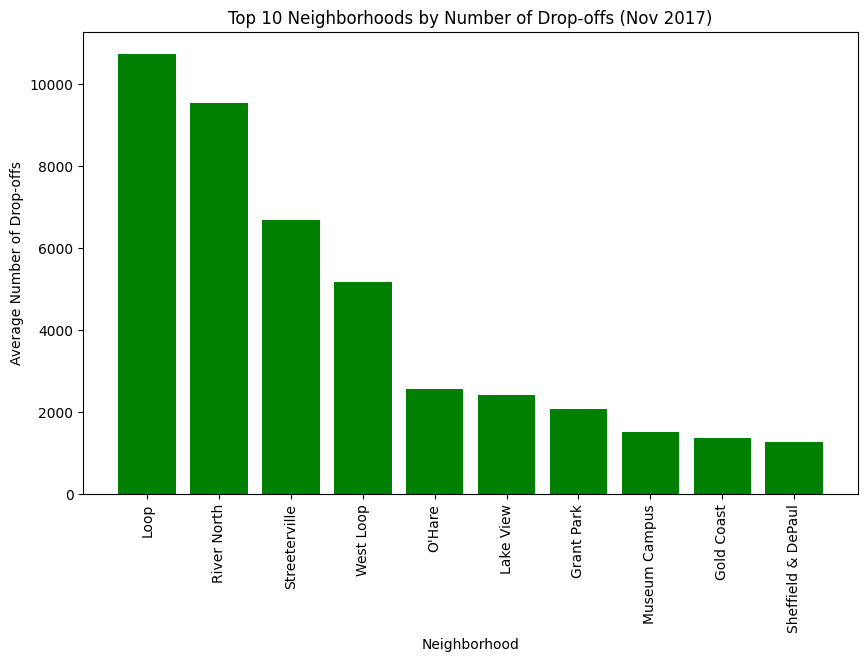

In [3]:
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)


plt.figure(figsize=(10,6))
plt.bar(top_10_neighborhoods['dropoff_location_name'], top_10_neighborhoods['average_trips'], color='green')
plt.title('Top 10 Neighborhoods by Number of Drop-offs (Nov 2017)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.xticks(rotation=90)
plt.show()



The graph shows the top 10 neighborhoods by the average number of drop-offs in November 2017. The Loop is the highest-performing neighborhood, with over 10,000 average drop-offs, making it a significant hub for taxi activity. River North comes in second, followed by Streeterville and West Loop, all of which show strong demand. O'Hare, despite being a major transportation hub, ranks lower than these densely populated neighborhoods, suggesting that drop-offs may be spread across various access points to the airport. The presence of neighborhoods like Lake View and Grant Park further emphasizes the geographic diversity in drop-off locations across Chicago. This analysis indicates that central business districts and tourist areas tend to generate the highest demand for taxi services.

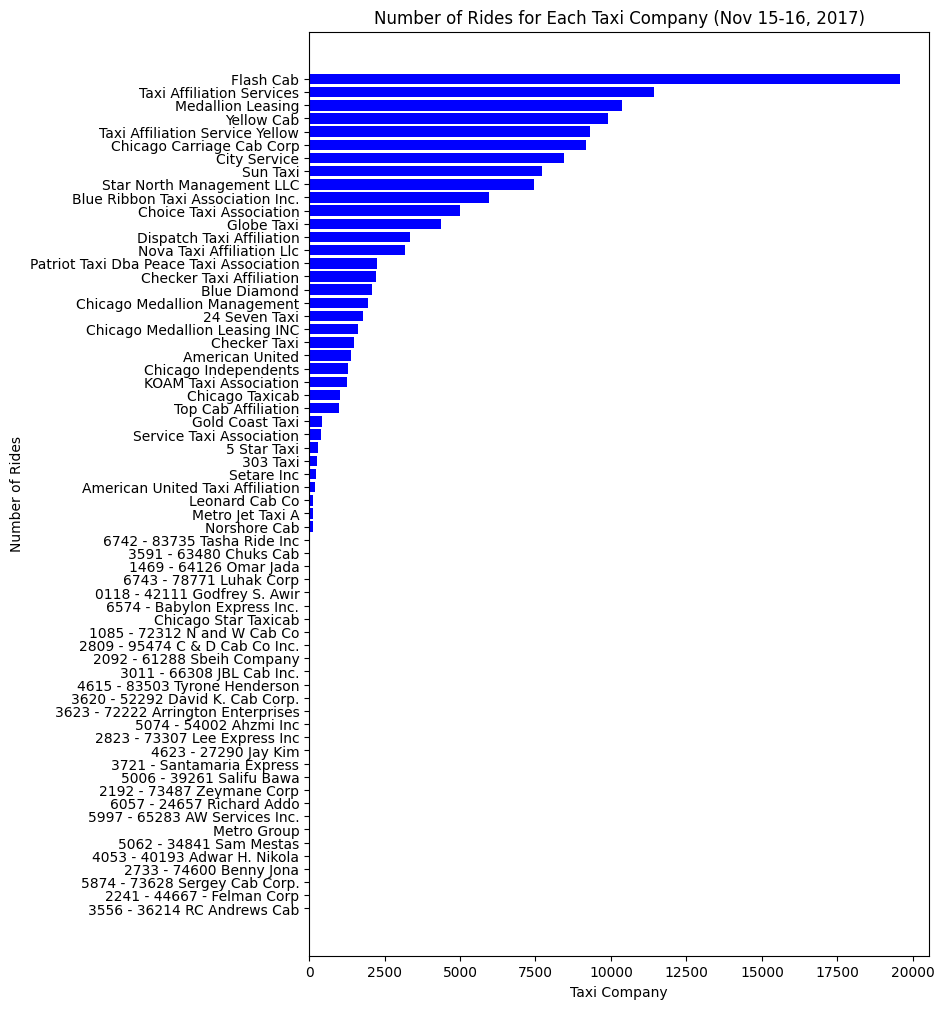

In [4]:
plt.figure(figsize=(8,12))
plt.barh(df_taxi_companies.sort_values(by='trips_amount', ascending=True)['company_name'], 
         df_taxi_companies.sort_values(by='trips_amount', ascending=True)['trips_amount'], color='blue')
plt.title('Number of Rides for Each Taxi Company (Nov 15-16, 2017)')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Rides')
plt.show()


The horizontal bar chart illustrates the number of rides for each taxi company on November 15-16, 2017, sorted in ascending order. Flash Cab stands out with the highest number of rides, far surpassing other companies. A few companies, like Checker Taxi Affiliation and Chicago Carriage Cab Corp, follow at a distance, with the remaining companies having significantly fewer rides. The sharp drop-off after the top companies highlights a market dominated by a few large players, with many smaller operators competing for a much smaller share of rides.










This code performs an analysis of the df_rides_weather dataset, which contains information on ride start times, weather conditions, and ride durations. Initially, the code displays the first few rows of the dataset and checks for missing values, confirming that no data is missing. The info() function shows that the dataset contains 1,068 entries across three columns, with no issues in data types.

Next, the code identifies 197 duplicate rows within the dataset. To ensure accurate analysis, the duplicates are dropped using the drop_duplicates() function, and a subsequent check confirms that all duplicates have been successfully removed, leaving 871 unique entries. The final DataFrame is displayed, ensuring that the dataset is now clean and ready for further analysis.

In [6]:
df_rides_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

# Display the first few rows
display(df_rides_weather.head())

# Display the info of the DataFrame
display(df_rides_weather.info())

# Check for missing values
print("\nMissing Values in Rides and Weather Data:")
display(df_rides_weather.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows in the Data:")
duplicate_count = df_rides_weather.duplicated().sum()
print(duplicate_count)

# Drop duplicate rows
df_rides_weather = df_rides_weather.drop_duplicates()

# Verify that duplicates have been dropped
print("\nNumber of Duplicate Rows After Dropping:")
duplicate_count_after = df_rides_weather.duplicated().sum()
print(duplicate_count_after)

# Display the DataFrame after dropping duplicates
display(df_rides_weather.head())


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


None


Missing Values in Rides and Weather Data:


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Number of Duplicate Rows in the Data:
197

Number of Duplicate Rows After Dropping:
0


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [7]:
#Added by reviewer

weather_rides = pd.read_csv('/datasets/project_sql_result_07.csv')

weather_rides.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)


This code converts the start_ts column (ride start time) in the df_rides_weather DataFrame into a datetime format and extracts the day of the week, storing it in a new column called weekday. The code then filters the DataFrame to include only rides that occurred on Saturdays (where weekday == 5). The result shows the first few rows of the filtered dataset, with all rides occurring on Saturdays and weather conditions labeled as "Good." This prepares the data for further analysis, specifically focusing on Saturday rides.

In [8]:
df_rides_weather['start_ts'] = pd.to_datetime(df_rides_weather['start_ts'])

df_rides_weather['weekday'] = df_rides_weather['start_ts'].dt.weekday  
saturday_rides = df_rides_weather[df_rides_weather['weekday'] == 5]


display(saturday_rides.head())


,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5


To test the hypothesis, I used an independent samples t-test. This test compares the means of two independent groups to determine whether there is a statistically significant difference between them. In this case, the two groups are ride durations on rainy Saturdays and non-rainy Saturdays. Since we do not assume that the variances of the two groups are equal, I set the equal_var=False parameter in the t-test. I set the significance level (α) to 0.05, which is a commonly used threshold in hypothesis testing. If the p-value is less than 0.05, I will reject the null hypothesis and conclude that the average ride duration on rainy Saturdays is significantly different from non-rainy Saturdays. Otherwise, I will fail to reject the null hypothesis.

In [9]:
from scipy.stats import ttest_ind

# Formulating the hypotheses
print("Null Hypothesis (H₀): The average duration of rides on rainy Saturdays is equal to the average duration of rides on non-rainy Saturdays.")
print("Alternative Hypothesis (H₁): The average duration of rides on rainy Saturdays is different from the average duration of rides on non-rainy Saturdays.\n")

# Separate the ride durations based on weather conditions
bad_weather_rides = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_rides = saturday_rides[saturday_rides['weather_conditions'] == 'Good']['duration_seconds']

# Perform the t-test
t_stat, p_value = ttest_ind(bad_weather_rides, good_weather_rides, equal_var=False)

# Output the t-test result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Set significance level (alpha)
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")

if p_value < alpha:
    print("We reject the null hypothesis. The ride duration changes on rainy Saturdays.")
else:
    print("We fail to reject the null hypothesis. The ride duration does not significantly change on rainy Saturdays.")



Null Hypothesis (H₀): The average duration of rides on rainy Saturdays is equal to the average duration of rides on non-rainy Saturdays.
Alternative Hypothesis (H₁): The average duration of rides on rainy Saturdays is different from the average duration of rides on non-rainy Saturdays.

T-statistic: 5.531968188074177
P-value: 9.126383933880083e-08

Significance level (alpha): 0.05
We reject the null hypothesis. The ride duration changes on rainy Saturdays.


The independent t-test results show a significant difference in the average ride duration between rainy and non-rainy Saturdays. With a p-value much lower than the alpha threshold (p < 0.05), we reject the null hypothesis and conclude that weather conditions (rainy vs. non-rainy) have a statistically significant impact on ride duration on Saturdays.

# Conclusion
### This analysis aimed to understand patterns in taxi rides across different Chicago neighborhoods and assess the impact of weather on ride duration, specifically on Saturdays. Using three datasets, we conducted an exploratory data analysis and a hypothesis test to derive meaningful insights.

### First, we examined taxi ride data from November 15-16, 2017, and identified Flash Cab as the company with the highest number of rides. We also looked at neighborhood drop-offs in November 2017, with The Loop having the most drop-offs, followed by River North and Streeterville, showing that central and busy districts dominate taxi activity.

### The dataset for rides from the Loop to O'Hare International Airport, which included weather conditions and ride durations, revealed no missing values but contained 197 duplicate rows. After removing these duplicates, we ensured the data was clean and ready for further analysis.

### Next, we conducted a t-test to determine if there was a significant difference in ride durations between rainy and non-rainy Saturdays. The test results showed a statistically significant difference (p-value < 0.05), leading us to reject the null hypothesis. We concluded that ride durations on rainy Saturdays are significantly different from those on non-rainy Saturdays, indicating that weather conditions have a measurable impact on ride times.

### Overall, this analysis provides important insights into how taxi services vary across neighborhoods and companies, as well as how external factors like weather influence ride durations. These findings could help Zuber optimize its operations and better serve its customers by accounting for weather and location-based ride patterns.